# **Crop Production Analysis and Prediction**

In [1]:
# Importing Important Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
# Loading Crop production data
data = pd.read_csv('Crop Production data.csv')

# Loading India map shape file
shapfile = gpd.read_file('India-map/IND_adm2.shp')

In [3]:
# Statistical overview of the data
data.describe(include='all')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,246091,246091,246091.000000,246091,246091,2.460910e+05,2.423610e+05
unique,34,644,NaN,8,126,NaN,NaN
top,Uttar Pradesh,BIJAPUR,NaN,Kharif,Rice,NaN,NaN
freq,33306,945,NaN,93584,15104,NaN,NaN
mean,NaN,NaN,2005.643018,NaN,NaN,1.200282e+04,5.825034e+05
std,NaN,NaN,4.952164,NaN,NaN,5.052340e+04,1.706581e+07
min,NaN,NaN,1997.000000,NaN,NaN,4.000000e-02,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.000000e+01,8.800000e+01
50%,NaN,NaN,2006.000000,NaN,NaN,5.820000e+02,7.290000e+02
75%,NaN,NaN,2010.000000,NaN,NaN,4.392000e+03,7.023000e+03


In [4]:
# Basic info about features datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
# Checking for missing values
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
# Overview of the raw data
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0


In [7]:
# Dropping uneccessary features from the mapping dataframe
shapfile.drop(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'ID_2', 'HASC_2',
       'CCN_2', 'CCA_2', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2'],inplace=True,axis=1)
shapfile.columns = ['State','District','geometry']
shapfile.head()

,State,District,geometry
0,Andaman and Nicobar,Nicobar Islands,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
1,Andaman and Nicobar,North and Middle Andaman,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
2,Andaman and Nicobar,South Andaman,"MULTIPOLYGON (((93.8397 12.32082, 93.85775 12...."
3,Andhra Pradesh,Anantapur,"POLYGON ((77.69 15.17628, 77.69378 15.17347, 7..."
4,Andhra Pradesh,Chittoor,"POLYGON ((78.47611 13.9368, 78.48208 13.93007,..."


In [8]:
# Removing extra space and Capitaizing each word
shapfile['District'] = shapfile['District'].str.strip().str.upper()
shapfile['State'] = shapfile['State'].str.strip().str.upper()

In [9]:
# Removing extra space and Capitaizing each word 
data['State_Name'] = data['State_Name'].str.strip().str.upper()
data['District_Name'] = data['District_Name'].str.strip().str.upper()
data['Season'] = data['Season'].str.strip().str.upper()

In [10]:
# Separating NULL production data 
pred_data = data[data.Production.isnull()]
data = data[~data.Production.isnull()]

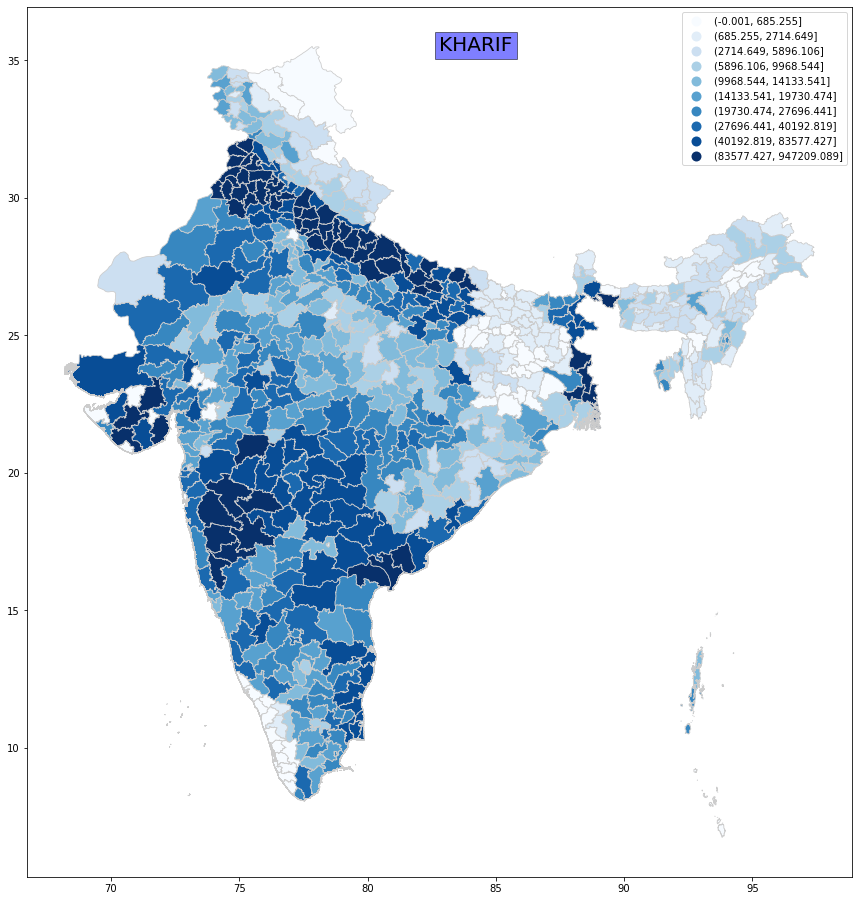

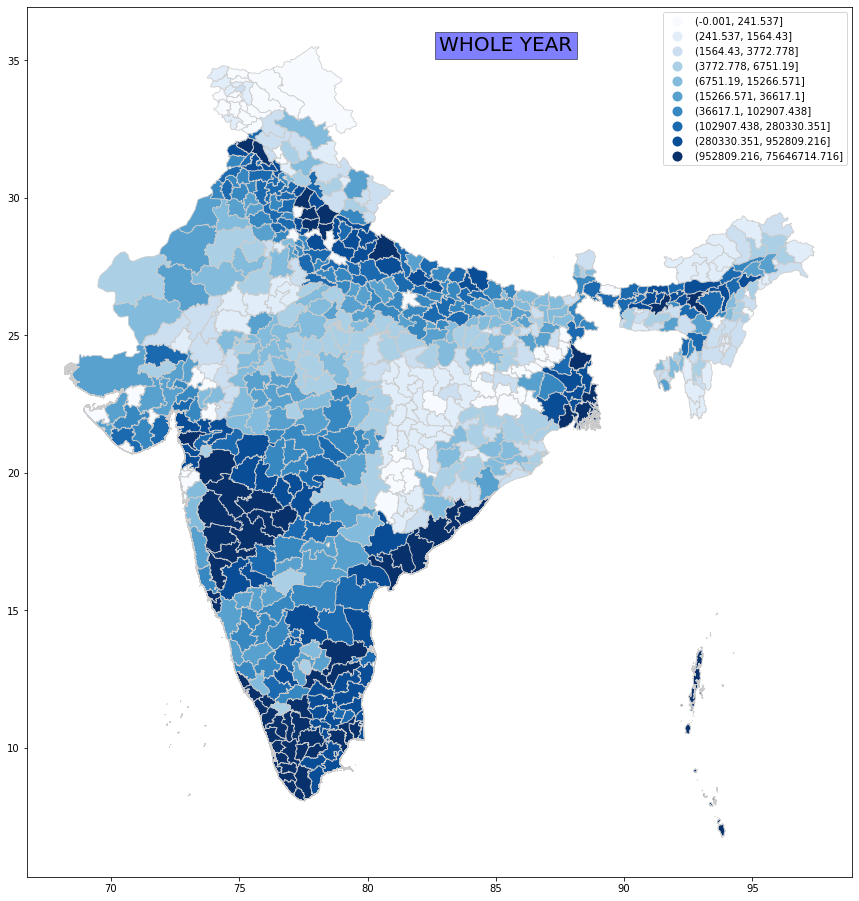

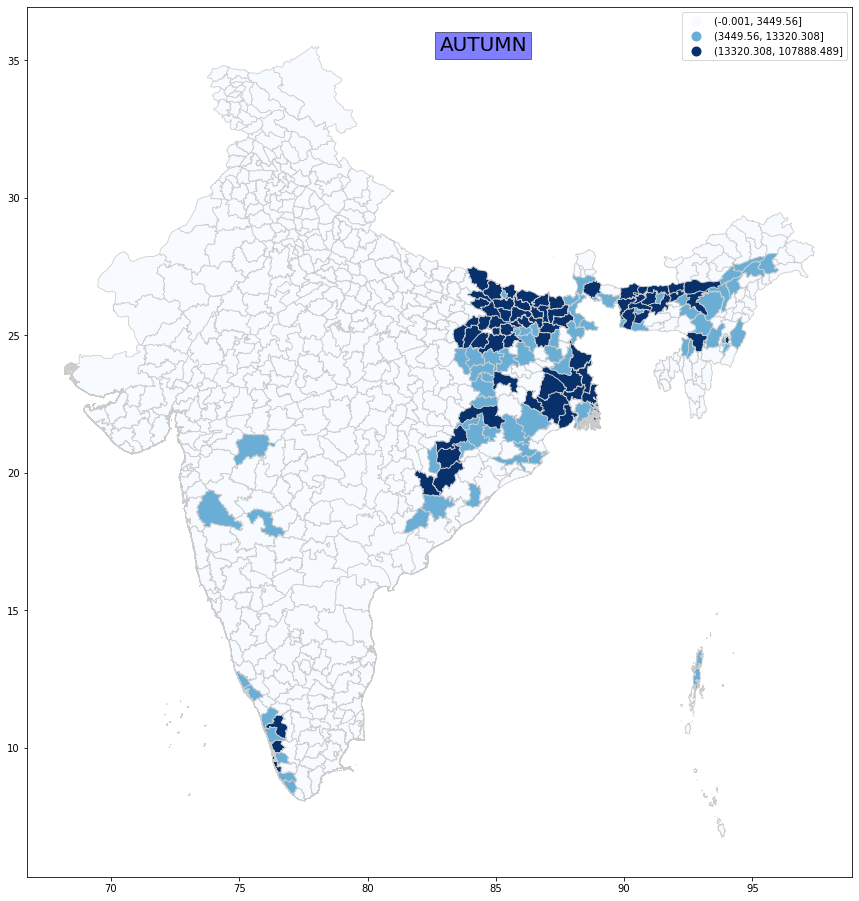

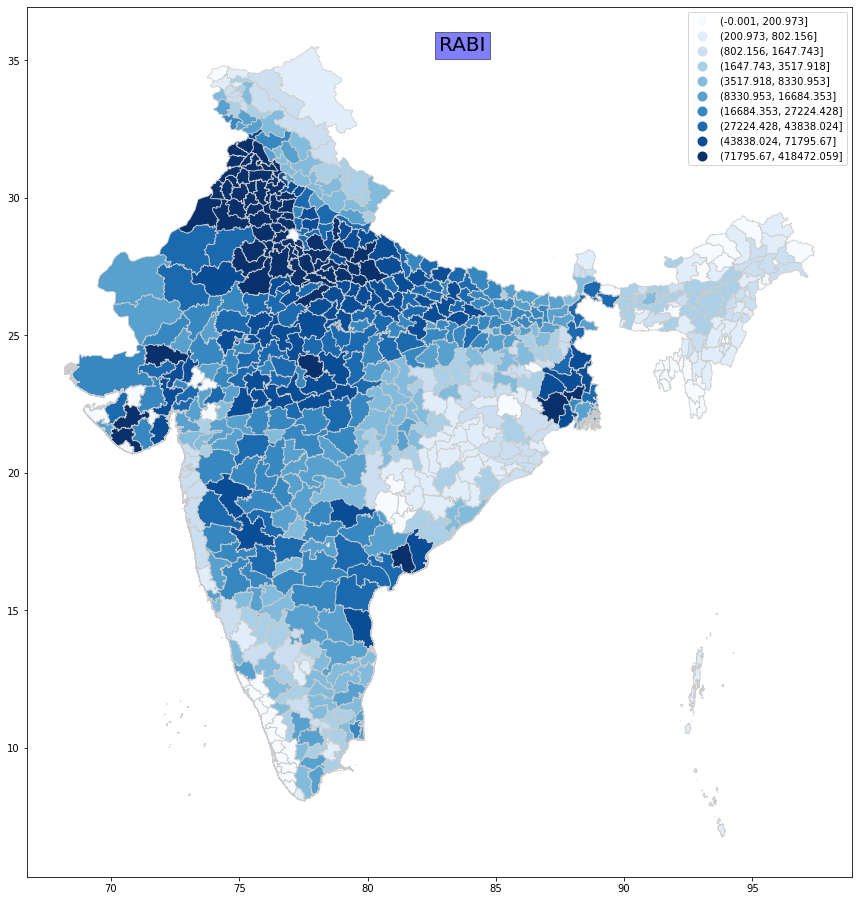

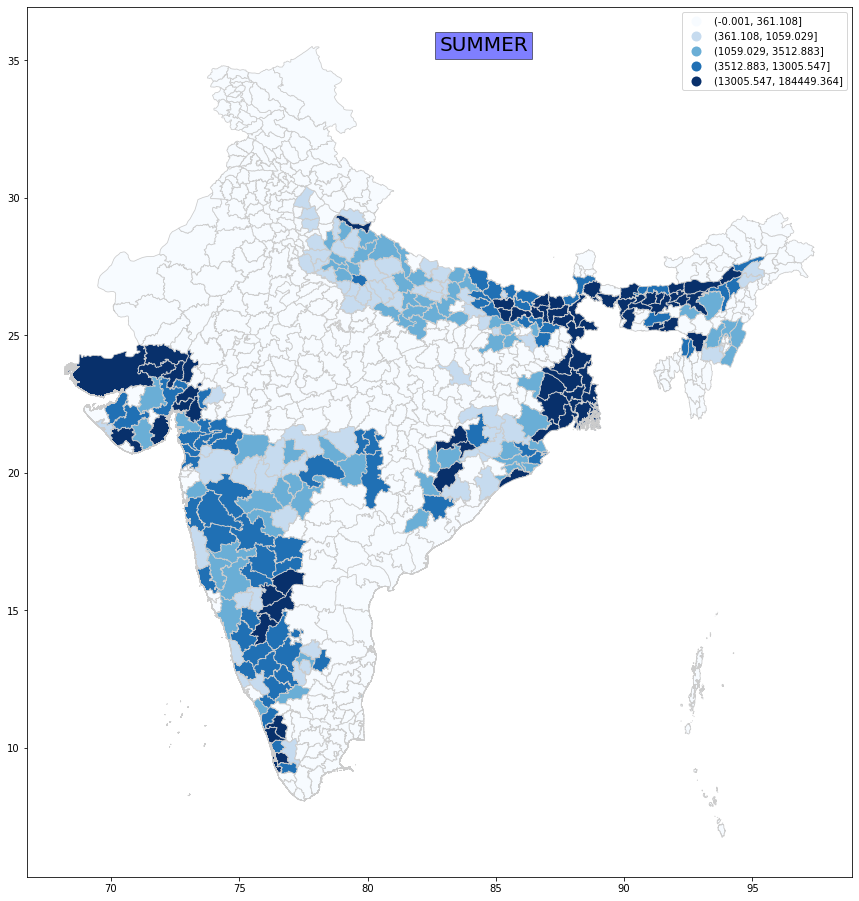

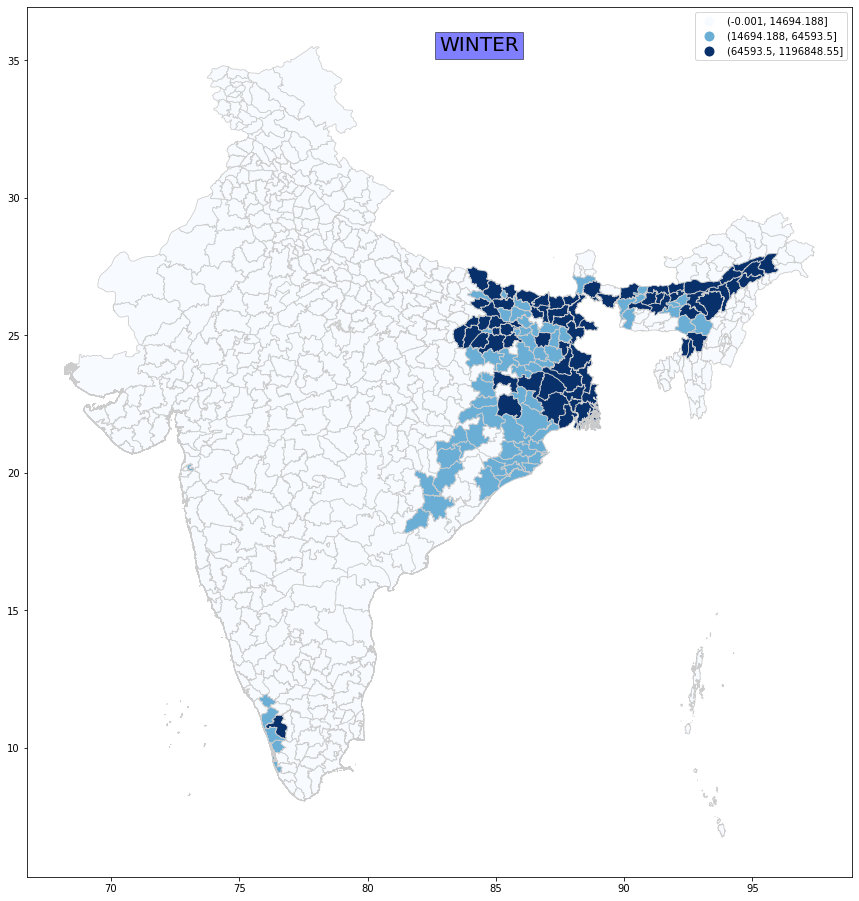

In [11]:
# Creating charts for each seasons
for season in data.Season.unique():
    plt.figure(figsize=(20,16))
    
    plt_data = data[data.Season==season]\
        .groupby(['State_Name','District_Name'])['Production']\
        .mean()\
        .reset_index()
    
    merged_data = pd.merge(shapfile,plt_data,how='left',left_on=['State','District'],right_on=['State_Name','District_Name'])
    merged_data.drop(['State_Name','District_Name'],inplace=True,axis=1)
    
    merged_data.Production = merged_data.Production.fillna(0)
    merged_data.Production = pd.qcut(merged_data.Production,q=10,duplicates='drop')
    
    ax = merged_data.plot(column='Production',cmap='Blues', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
    plt.text(0.5,0.95,season.strip(),transform=ax.transAxes, bbox=dict(facecolor='blue',alpha=0.5),fontsize=20)
    
    plt.show()

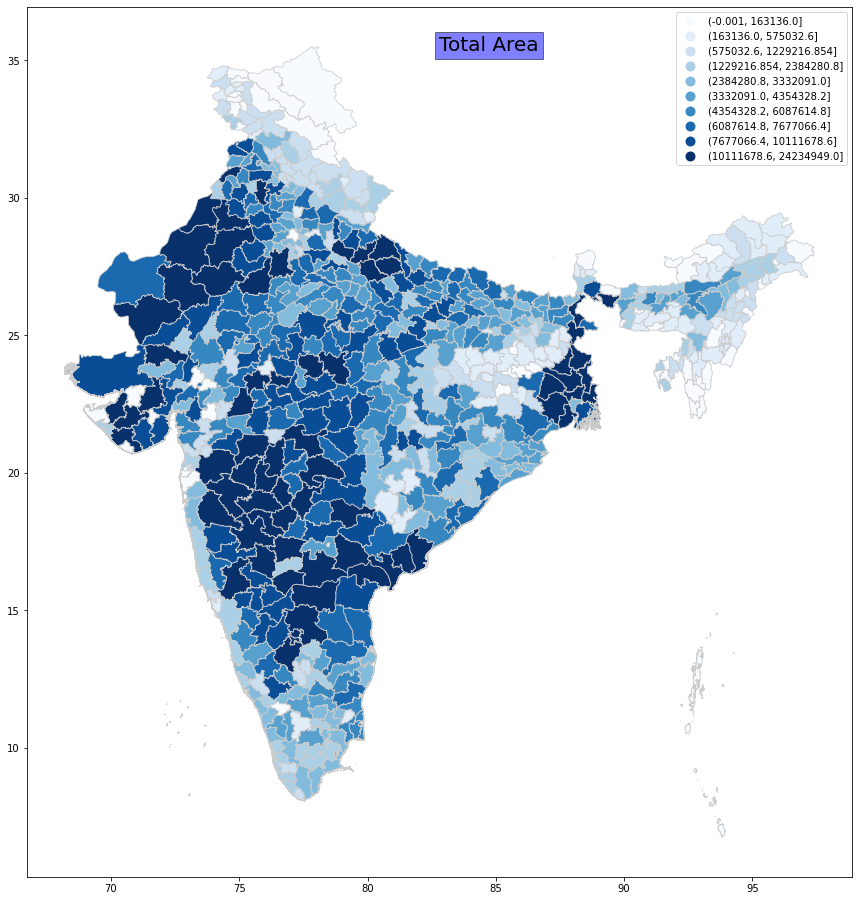

In [12]:
# Creating charts for Total Area
plt.figure(figsize=(20,16))
    
plt_data = data\
    .groupby(['State_Name','District_Name'])['Area']\
    .sum()\
    .reset_index()

merged_data = pd.merge(shapfile,plt_data,how='left',left_on=['State','District'],right_on=['State_Name','District_Name'])
merged_data.drop(['State_Name','District_Name'],inplace=True,axis=1)

merged_data.Area = merged_data.Area.fillna(0)
merged_data.Area = pd.qcut(merged_data.Area,q=10,duplicates='drop')

ax = merged_data.plot(column='Area',cmap='Blues', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
plt.text(0.5,0.95,'Total Area',transform=ax.transAxes, bbox=dict(facecolor='blue',alpha=0.5),fontsize=20)

plt.show()

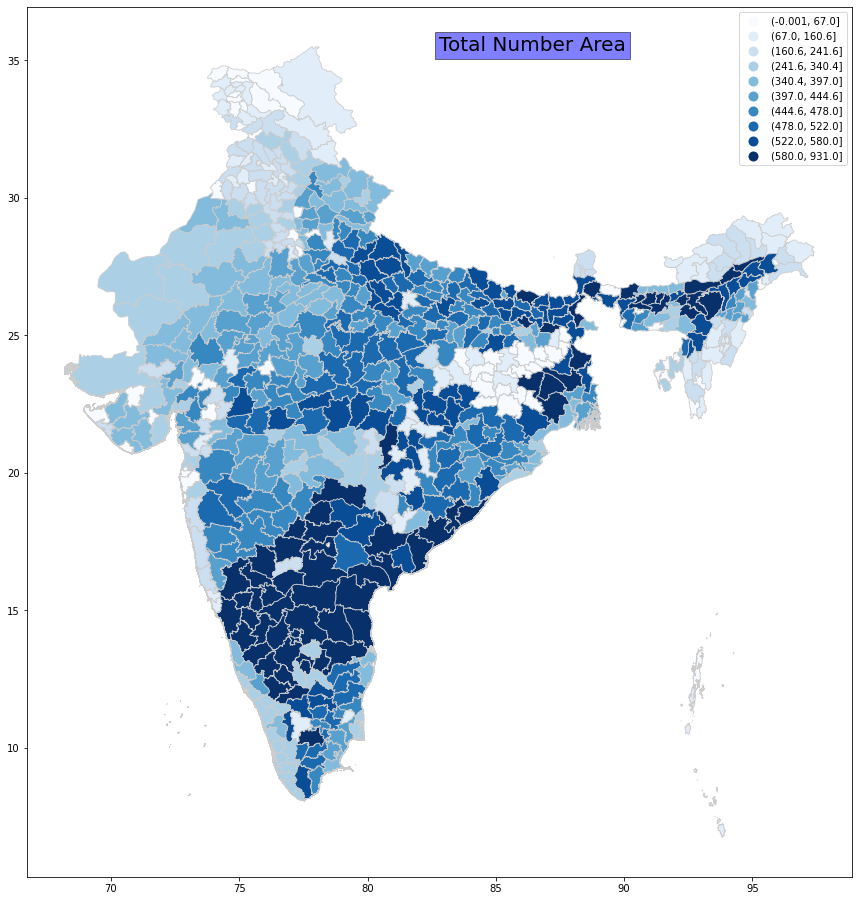

In [13]:
# Creating charts for Number of fields
plt.figure(figsize=(20,16))
    
plt_data = data\
    .groupby(['State_Name','District_Name'])['Area']\
    .count()\
    .reset_index()

merged_data = pd.merge(shapfile,plt_data,how='left',left_on=['State','District'],right_on=['State_Name','District_Name'])
merged_data.drop(['State_Name','District_Name'],inplace=True,axis=1)

merged_data.Area = merged_data.Area.fillna(0)
merged_data.Area = pd.qcut(merged_data.Area,q=10,duplicates='drop')

ax = merged_data.plot(column='Area',cmap='Blues', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
plt.text(0.5,0.95,'Total Number Area',transform=ax.transAxes, bbox=dict(facecolor='blue',alpha=0.5),fontsize=20)

plt.show()

In [14]:
# Finding Top States by Production
top_10 = data\
    .groupby(['State_Name'])['Production']\
    .sum()\
    .reset_index()\
    .sort_values(by='Production',ascending=False)[:10]
top_10

,State_Name,Production
15,KERALA,9.788005e+10
1,ANDHRA PRADESH,1.732459e+10
27,TAMIL NADU,1.207644e+10
30,UTTAR PRADESH,3.234493e+09
3,ASSAM,2.111752e+09
32,WEST BENGAL,1.397904e+09
17,MAHARASHTRA,1.263641e+09
14,KARNATAKA,8.634298e+08
0,ANDAMAN AND NICOBAR,7.182232e+08
24,PUNJAB,5.863850e+08


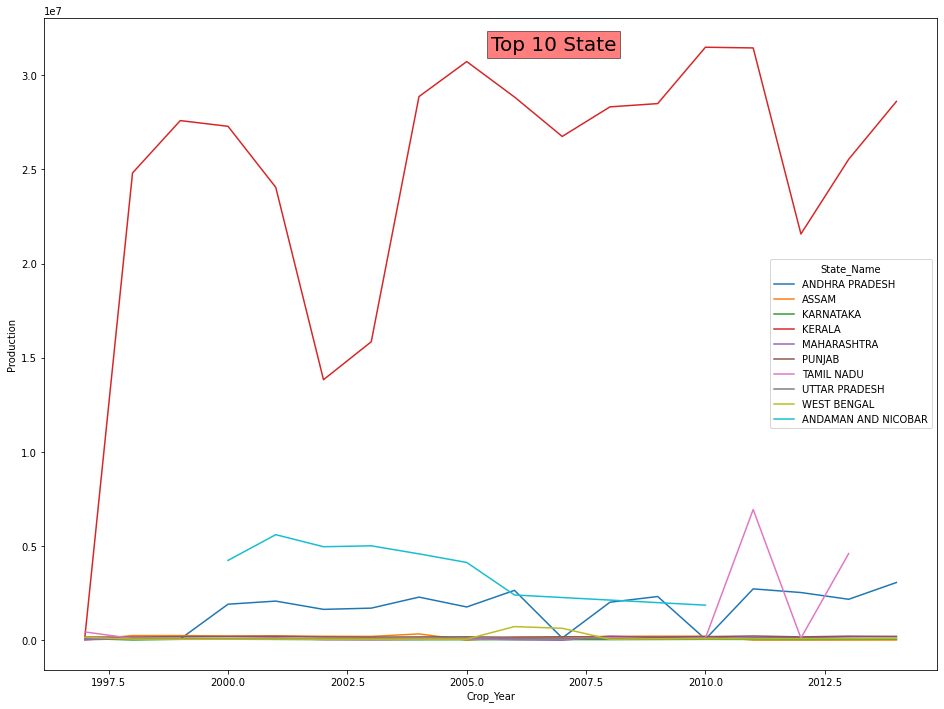

In [15]:
# Ploting Top 10 states year wise production
plt_data = data[data.State_Name.isin(top_10.State_Name)]\
    .groupby(['Crop_Year','State_Name'])['Production']\
    .mean()\
    .reset_index()
plt.figure(figsize=(16,12))
ax = sns.lineplot(x=plt_data.Crop_Year,y=plt_data.Production,hue=plt_data.State_Name,ax=plt.gca())
plt.text(0.5,0.95,'Top 10 State',transform=ax.transAxes, bbox=dict(facecolor='red',alpha=0.5),fontsize=20)
plt.show()

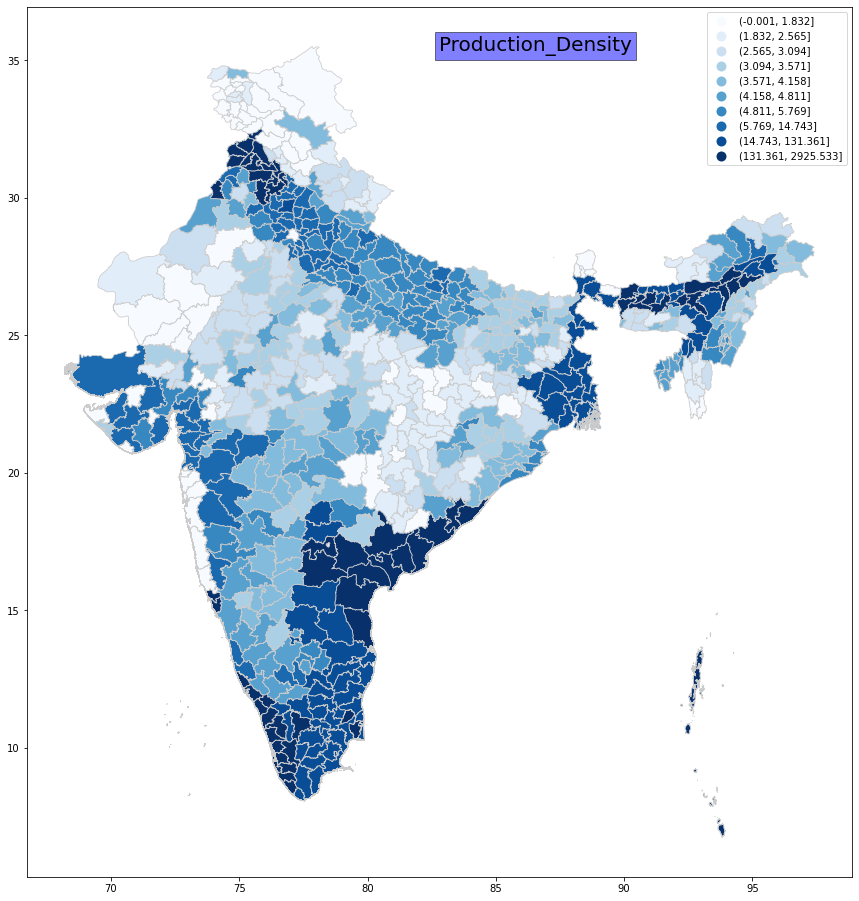

In [16]:
# Creating chart for Production density
plt.figure(figsize=(20,16))

data['Production_Density'] = data.Production/data.Area
plt_data = data.groupby(['State_Name','District_Name'])['Production_Density']\
    .mean()\
    .reset_index()

merged_data = pd.merge(shapfile,plt_data,how='left',left_on=['State','District'],right_on=['State_Name','District_Name'])
merged_data.drop(['State_Name','District_Name'],inplace=True,axis=1)

merged_data.Production_Density = merged_data.Production_Density.fillna(0)
merged_data.Production_Density = pd.qcut(merged_data.Production_Density,q=10,duplicates='drop')

ax = merged_data.plot(column='Production_Density',cmap='Blues', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
plt.text(0.5,0.95,'Production_Density',transform=ax.transAxes, bbox=dict(facecolor='blue',alpha=0.5),fontsize=20)

plt.show()

In [17]:
# Initialling Label encoder for encoding State, District and Crops names
le = LabelEncoder()

# performing Label encoding on district name
le.fit(data.District_Name)
data.District_Name = le.transform(data.District_Name)

# performing Label encoding on State name
le.fit(data.State_Name)
data.State_Name = le.transform(data.State_Name)

# performing Label encoding on Crop name
le.fit(data.Crop)
data.Crop = le.transform(data.Crop)

# performing One Hot encoding on seasons
data = pd.concat([data,pd.get_dummies(data.Season)],axis=1)

In [18]:
# Dropping extra features
data.drop(['Production_Density','WHOLE YEAR','Season'],axis=1,inplace=True)
data.head()

,State_Name,District_Name,Crop_Year,Crop,Area,Production,AUTUMN,KHARIF,RABI,SUMMER,WINTER
0,0,418,2000,2,1254.0,2000.0,0,1,0,0,0
1,0,418,2000,74,2.0,1.0,0,1,0,0,0
2,0,418,2000,97,102.0,321.0,0,1,0,0,0
3,0,418,2000,7,176.0,641.0,0,0,0,0,0
4,0,418,2000,22,720.0,165.0,0,0,0,0,0


<AxesSubplot:>

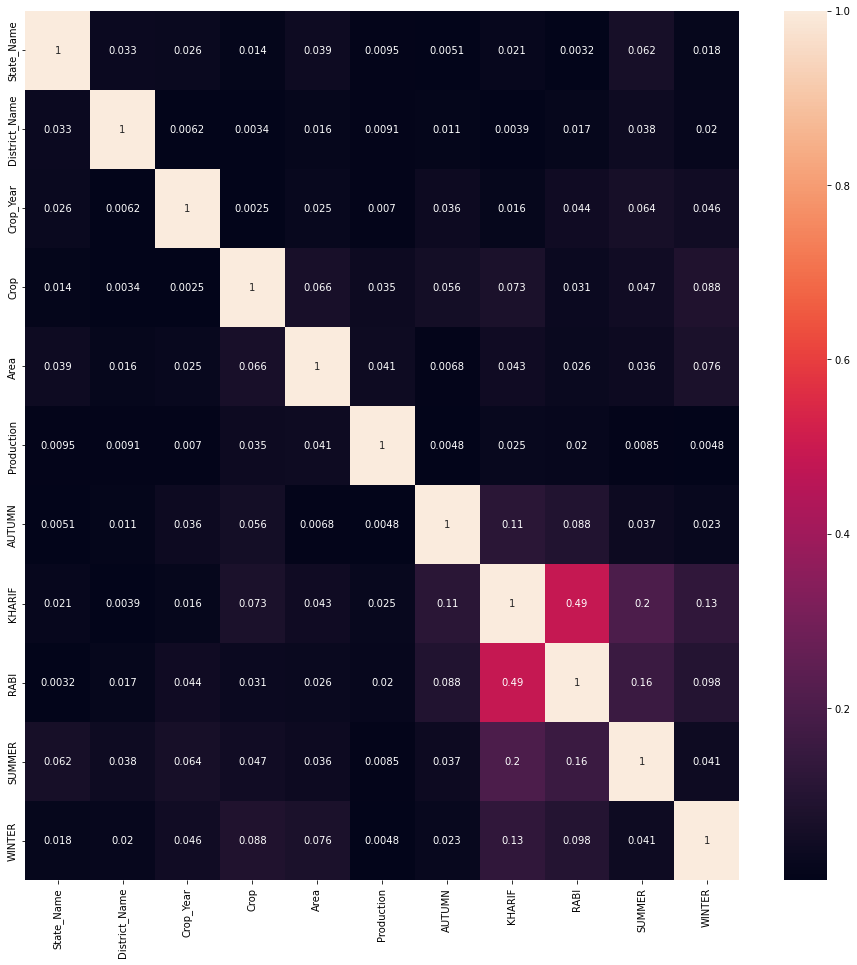

In [19]:
# Showing data heatmap
plt.figure(figsize=(16,16))
sns.heatmap(abs(data.corr()),annot=True,ax=plt.gca())

In [20]:
# performing train test split for the data validation
X  = data.drop('Production',axis=1)
y = data.Production
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# Initializing RandomForest model and fitting the model with train data
rf = RandomForestRegressor(n_estimators=500,max_depth=7,)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=500)

In [27]:
# Predicting the data with Test data
y_pred = rf.predict(X_test)
print('Mean Abosolute Error: ',mean_absolute_error(y_test,y_pred))
print('R-Squared Error: ',r2_score(y_test,y_pred))

Mean Abosolute Error:  215652.28864114734
R-Squared Error:  0.7766972103854695


In [29]:
# Predicting the data with Train data
y_pred = rf.predict(X_train)
print('Mean Abosolute Error: ',mean_absolute_error(y_train,y_pred))
print('R-Squared Error: ',r2_score(y_train,y_pred))

Mean Abosolute Error:  168985.14962020074
R-Squared Error:  0.9459877809490216
